<a href="https://colab.research.google.com/github/der-himmel/obr-iz/blob/main/obr_iz_pz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [27]:
url = "https://evivid.ru/vk/img.php?url=https%3A%2F%2Fsun9-40.userapi.com%2Fimpg%2FCNGYtv5mZs4rONGMJx0crZ6-ajN_8sbPFP93wA%2FONDINN4x9aQ.jpg%3Fsize%3D429x604%26quality%3D96%26sign%3D701e7d60fa1fea0d6207e0a422c9d7eb%26c_uniq_tag%3DZESB4zRepXZuywLbaczntiMWkgX5Uiovn25WomRgztY%26type%3Dalbum"

Загрузка изображения

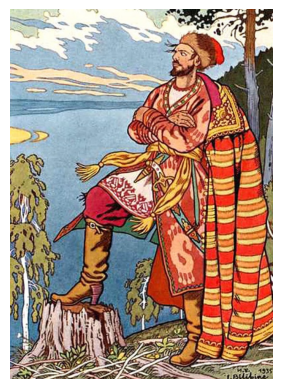

In [28]:
img = io.imread(url)
plt.axis('off')
plt.imshow(img)

1. Обнуление канала

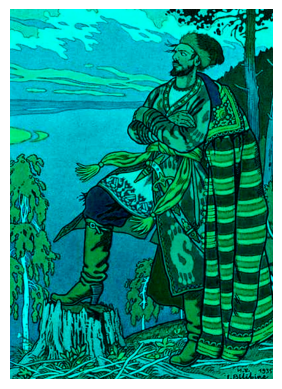

In [29]:
img_copy = img.copy()

# обнуление красного канала
img_copy[:,:, 0] = 0

plt.axis('off')
plt.imshow(img_copy)

2. Конвертация в grayscale

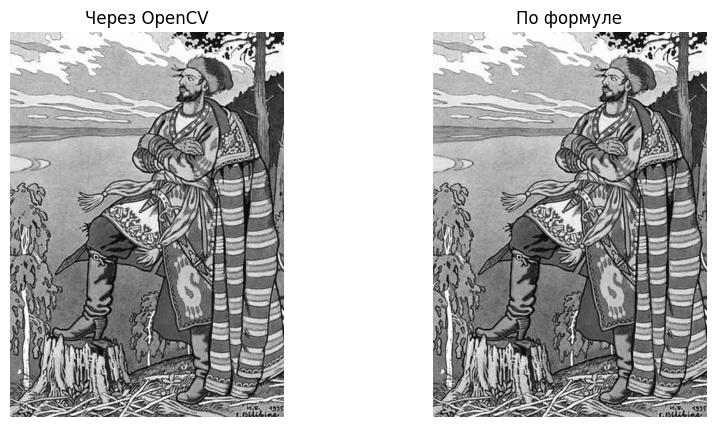

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def rgb_to_grayscale(image: np.ndarray) -> np.ndarray:
    if image.ndim == 3:
        img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        grayscale_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = image

    return grayscale_image

# Альтернативное решение
def rgb_to_grayscale_via_formula(image: np.ndarray) -> np.ndarray:
    if image.ndim == 3:
        grayscale_image = image[:, :, 0] * 0.299 + image[:, :, 1] * 0.587 + image[:, :, 2] * 0.114
    else:
        grayscale_image = image

    return grayscale_image

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1), plt.title("Через OpenCV"), plt.imshow(rgb_to_grayscale(img), cmap='gray'), plt.axis('off')
plt.subplot(1, 2, 2), plt.title("По формуле"), plt.imshow(rgb_to_grayscale_via_formula(img), cmap='gray'), plt.axis('off')

plt.show()


3. Изменение цвета изображения

In [ ]:
def add_value(image: np.ndarray, chan_id: list, val: int) -> np.ndarray:
    adjusted_img = image.copy()
    if adjusted_img.ndim == 3:
      for channel in chan_id:
        adjusted_img[:, :, chan_id] = np.clip(adjusted_img[:, :, chan_id] + val, 0, 255)
    else:
        print("Картинка не цветная")

    return adjusted_img

adjusted_img = add_value(img, chan_id=[0,1,2], val=-50)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1), plt.title("Оригинальное изображение"), plt.imshow(img), plt.axis('off')

plt.subplot(1, 2, 2), plt.title("Измененное изображение"), plt.imshow(adjusted_img), plt.axis('off')

plt.show()


4. RGB --> HSV

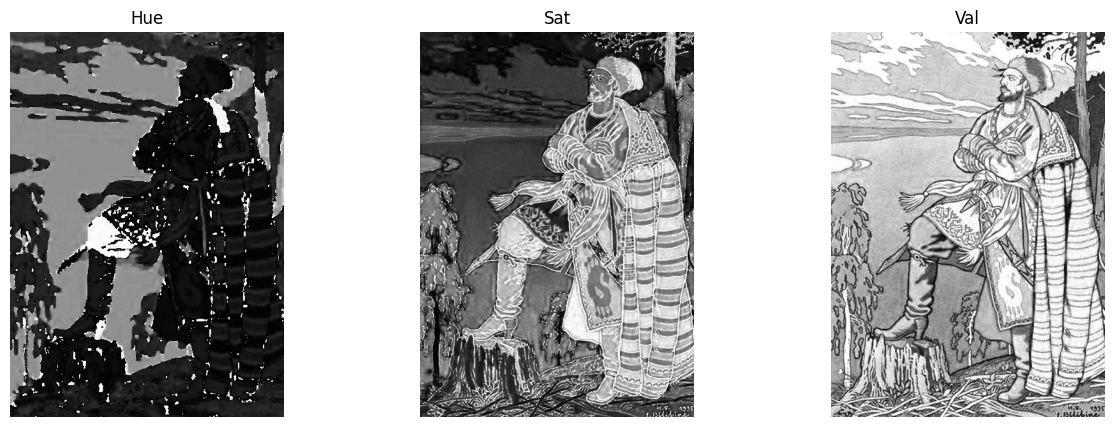

In [37]:
def rgb_to_hsv(image: np.ndarray) -> np.ndarray:
    img_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    hsv_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    return hsv_image

# Альтернативное решение
# def rgb_to_hsv(image: np.ndarray) -> np.ndarray:
#     rgb = image / 255.0
#     hsv_image = np.zeros_like(rgb)

#     max_rgb = np.max(rgb, axis=2)
#     min_rgb = np.min(rgb, axis=2)
#     delta = max_rgb - min_rgb

#     hue = np.zeros_like(max_rgb)

#     mask_r = (max_rgb == rgb[:, :, 0])
#     mask_g = (max_rgb == rgb[:, :, 1])
#     mask_b = (max_rgb == rgb[:, :, 2])

#     hue[mask_r] = (60 * ((rgb[mask_r, 1] - rgb[mask_r, 2]) / delta[mask_r])) % 360
#     hue[mask_g] = (60 * ((rgb[mask_g, 2] - rgb[mask_g, 0]) / delta[mask_g])) + 120
#     hue[mask_b] = (60 * ((rgb[mask_b, 0] - rgb[mask_b, 1]) / delta[mask_b])) + 240

#     saturation = np.zeros_like(max_rgb)
#     saturation[max_rgb > 0] = delta[max_rgb > 0] / max_rgb[max_rgb > 0]

#     value = max_rgb

#     hsv_image[:, :, 0] = hue
#     hsv_image[:, :, 1] = saturation
#     hsv_image[:, :, 2] = value

#     return hsv_image

converted = rgb_to_hsv(img)

plt.figure(figsize=(15, 5))

plt.subplot(131), plt.title("Hue"), plt.imshow(converted[:, :, 0], cmap='gray'), plt.axis('off')

plt.subplot(132), plt.title("Sat"), plt.imshow(converted[:, :, 1], cmap='gray'), plt.axis('off')

plt.subplot(133), plt.imshow(converted[:, :, 2], cmap='gray'), plt.axis('off'), plt.title("Val")

plt.show()

5. Логические операции

(<Axes: >, <matplotlib.image.AxesImage at 0x77ffbe22c730>)

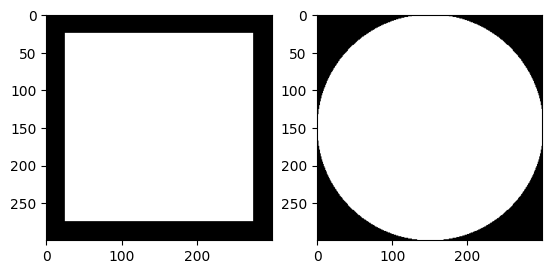

In [39]:
rectangle = np.zeros((300, 300), dtype="uint8")
rectangle[25:275, 25:275] = 255

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

plt.figure()

plt.subplot(121), plt.imshow(rectangle, cmap='gray')
plt.subplot(122), plt.imshow(circle, cmap='gray')

In [38]:
#TODO: переделать без использования opencv

def logical_not(image: np.ndarray) -> np.ndarray:
    return cv2.bitwise_not(image)

def logical_and(image1: np.ndarray, image2: np.ndarray) -> np.ndarray:
    return cv2.bitwise_and(image1, image2)

def logical_or(image1: np.ndarray, image2: np.ndarray) -> np.ndarray:
    return cv2.bitwise_or(image1, image2)

def logical_xor(image1: np.ndarray, image2: np.ndarray) -> np.ndarray:
    return cv2.bitwise_xor(image1, image2)

not_rectangle = logical_not(rectangle)
and_result = logical_and(rectangle, circle)
or_result = logical_or(rectangle, circle)
xor_result = logical_xor(rectangle, circle)

plt.figure(figsize=(15, 10))

plt.subplot(251), plt.imshow(logical_not(rectangle), cmap='gray'), plt.title('NOT Прямоугольник')
plt.axis('off')

plt.subplot(252), plt.imshow(logical_and(rectangle, circle), cmap='gray'), plt.title('AND')
plt.axis('off')

plt.subplot(253), plt.imshow(logical_or(rectangle, circle), cmap='gray'), plt.title('OR')
plt.axis('off')

plt.subplot(254), plt.imshow(logical_xor(rectangle, circle), cmap='gray'), plt.title('XOR')
plt.axis('off')

plt.subplot(255), plt.imshow(logical_not(circle), cmap='gray'), plt.title('NOT Круг')
plt.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'rectangle' is not defined